In [245]:
# Used for Managing Data
import pandas as pd 
import numpy as np
# Used for loading pkl files 
import pickle 
# Used for Bar Graphs
import matplotlib.pyplot as plt 
# Used for Plotting choropleth maps 
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

In [236]:
# Loading Pkl files
df_poll = pickle.load( open( "df_us_pollution.pkl", "rb" ) )
df_mort = pickle.load( open( "df_resp_mortality.pkl", "rb" ) )

#Sums the total mortality rates per state per year (First makes mortality rate into float to be able to sum)
df_mort_nums =df_mort
df_mort_nums['mortality_rate'] = df_mort_nums['mortality_rate'].astype(float)
df_mort2 = df_mort_nums.groupby(['year','state'], as_index=False)['mortality_rate'].sum()

# Sets up Dfs for maps
df_mort_2000 = df_mort2.loc[df_mort2['year'].isin(['2000'])]
df_mort_2005 = df_mort2.loc[df_mort2['year'].isin(['2005'])]
df_mort_2010 = df_mort2.loc[df_mort2['year'].isin(['2010'])]
df_mort_2014 = df_mort2.loc[df_mort2['year'].isin(['2014'])]

# DF for plotting graph.
df_mort_CA = df_mort2.loc[df_mort2['state'].isin(['California'])]
df_mort_TX = df_mort2.loc[df_mort2['state'].isin(['Texas'])]

df_mort_DC = df_mort2.loc[df_mort2['state'].isin(['District of Columbia'])]
df_mort_AK = df_mort2.loc[df_mort2['state'].isin(['Alaska'])]

In [247]:
# Df for plotly map 
d = {'code':     ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
                  "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
                  
                  "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
                  
                  "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
                  "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"],
     
    'state':      ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','District of Columbia','Delaware','Florida','Georgia',
                   'Hawaii','Idaho', 'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine', 'Maryland',
                   
                   'Massachusetts','Michigan','Minnesota','Mississippi', 'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
                   
                   'New Mexico','New York','North Carolina','North Dakota','Ohio', 'Oklahoma','Oregon','Pennsylvania','Rhode Island','South  Carolina',
                   'South Dakota','Tennessee','Texas','Utah', 'Vermont','Virginia','Washington','West Virginia', 'Wisconsin','Wyoming'] ,
    'text':[0 for r in range(51)]}
dff = pd.DataFrame.from_dict(d)

#Color scale
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

# Text to display when hovered over state
dff['text'] = df_mort_2000['state'] 

# Compile map data
data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2000['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

# Map Layout set up 
layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2000 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

# Plot map
fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2000_Resp_Mortality')

In [238]:
dff['text'] = df_mort_2005['state'] 

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2005['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2005 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2005_Resp_Mortality')

In [239]:
dff['text'] = df_mort_2010['state'] 

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2010['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2010 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2010_Resp_Mortality')

In [240]:
dff['text'] = df_mort_2014['state']

data = [plotly.graph_objs.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = dff['code'],
    z = df_mort_2014['mortality_rate'],
    locationmode = 'USA-states',
    text = dff['text'],
    marker = plotly.graph_objs.choropleth.Marker(
        line = plotly.graph_objs.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = plotly.graph_objs.choropleth.ColorBar(
        title = "Deaths per 100k Pop.")
)]

layout = plotly.graph_objs.Layout(
    title = plotly.graph_objs.layout.Title(
        text = 'US Respiratory Disease Mortality Rate by State 2014 <br>(Hover for breakdown)'
    ),
    geo = plotly.graph_objs.layout.Geo(
        scope = 'usa',
        projection = plotly.graph_objs.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = plotly.graph_objs.Figure(data = data, layout = layout)
iplot(fig, filename = '2014_Resp_Mortality')

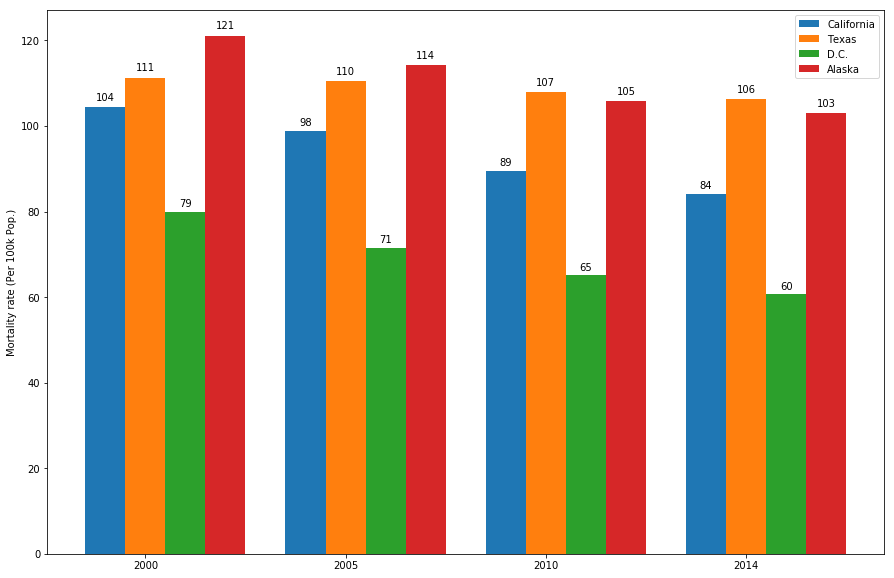

In [241]:
# Picked the two states with most pop
ind = np.arange(4)
width = 0.2
fig = plt.figure()
ax = fig.add_subplot(111)

b1 = ax.bar(ind, df_mort_CA['mortality_rate'], width, color='C0')
b2 = ax.bar(ind+width, df_mort_TX['mortality_rate'], width, color='C1')
b3 = ax.bar(ind+width*2, df_mort_DC['mortality_rate'], width, color='C2')
b4 = ax.bar(ind+width*3, df_mort_AK['mortality_rate'], width, color='C3')

ax.set_ylabel('Mortality rate (Per 100k Pop.)')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2000', '2005', '2010', '2014') )
ax.legend( (b1[0], b2[0], b3[0], b4[0]), ('California', 'Texas', 'D.C.', 'Alaska' ) )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.set_size_inches(15, 10, forward=True)
plt.show()

In [242]:
df_poll

,Unnamed: 0,State,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Units,O3 Mean,O3 1st Max Value,...,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,year_bin
0,0,Arizona,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,...,9.0,21,13.0,Parts per million,1.145833,4.200,21,NaN,2000,2000.0
1,1,Arizona,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,...,9.0,21,13.0,Parts per million,0.878947,2.200,23,25.0,2000,2000.0
2,2,Arizona,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,...,6.6,23,NaN,Parts per million,1.145833,4.200,21,NaN,2000,2000.0
3,3,Arizona,Parts per billion,19.041667,49.0,19,46,Parts per million,0.022500,0.040,...,6.6,23,NaN,Parts per million,0.878947,2.200,23,25.0,2000,2000.0
4,4,Arizona,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,...,3.0,22,4.0,Parts per million,0.850000,1.600,23,NaN,2000,2000.0
5,5,Arizona,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,...,3.0,22,4.0,Parts per million,1.066667,2.300,0,26.0,2000,2000.0
6,6,Arizona,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,...,2.6,23,NaN,Parts per million,0.850000,1.600,23,NaN,2000,2000.0
7,7,Arizona,Parts per billion,22.958333,36.0,19,34,Parts per million,0.013375,0.032,...,2.6,23,NaN,Parts per million,1.066667,2.300,0,26.0,2000,2000.0
8,8,Arizona,Parts per billion,38.125000,51.0,8,48,Parts per million,0.007958,0.016,...,11.0,19,16.0,Parts per million,1.929167,4.400,8,NaN,2000,2000.0
9,9,Arizona,Parts per billion,38.125000,51.0,8,48,Parts per million,0.007958,0.016,...,11.0,19,16.0,Parts per million,1.762500,2.500,8,28.0,2000,2000.0


In [243]:
df_poll2 = df_poll[['year','State', 'NO2 Mean','O3 Mean','SO2 Mean', 'CO Mean']]  

df_poll_2000 = df_poll2.loc[df_poll2['year'].isin(['2000'])]
df_poll_2005 = df_poll2.loc[df_poll2['year'].isin(['2005'])]
df_poll_2010 = df_poll2.loc[df_poll2['year'].isin(['2010'])]
df_poll_2014 = df_poll2.loc[df_poll2['year'].isin(['2014'])]


#To Do:
#Get mean average for every state by getting all rows with the same year and state and then calculate the mean for each pollution level

#For Plotting... 
#df_poll_CA = df_poll2.loc[df_poll2['state'].isin(['California'])]
#df_poll_TX = df_poll2.loc[df_poll2['state'].isin(['Texas'])]

#df_poll_DC = df_poll2.loc[df_poll2['state'].isin(['District of Columbia'])]
#df_poll_AK = df_poll2.loc[df_poll2['state'].isin(['Alaska'])]

In [244]:
df_poll_2000

,year,State,NO2 Mean,O3 Mean,SO2 Mean,CO Mean
0,2000,Arizona,19.041667,0.022500,3.000000,1.145833
1,2000,Arizona,19.041667,0.022500,3.000000,0.878947
2,2000,Arizona,19.041667,0.022500,2.975000,1.145833
3,2000,Arizona,19.041667,0.022500,2.975000,0.878947
4,2000,Arizona,22.958333,0.013375,1.958333,0.850000
5,2000,Arizona,22.958333,0.013375,1.958333,1.066667
6,2000,Arizona,22.958333,0.013375,1.937500,0.850000
7,2000,Arizona,22.958333,0.013375,1.937500,1.066667
8,2000,Arizona,38.125000,0.007958,5.250000,1.929167
9,2000,Arizona,38.125000,0.007958,5.250000,1.762500
